In [5]:
# import pandas_market_calendars as mcal
# from datetime import datetime
# import time
# import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


from BlackBox_Funs import connect, create_data, all_stocks_1050, get_array, sum, create_t_and_t
data_client = connect()


In [6]:
stock = "AMD"
stock_array = get_array(stock.upper())
spy_array = get_array("SPY")

In [26]:
# randomized buy and sells
x = 200 # amout of days for one full test
total = 100 # some starting value
# 3 actions of buy sell hold for each day
day1 = len(stock_array)

day_bought = 0  # when on array of last buy
hold = 0  # if currently holding a stock
sum_total = []
action = 0

for day in range(x):
    # get value of the day 1

    if hold == 1: # allready have the stock
        action = random.randint(0,2)  # sell or hold
        if action == 1: # sell 
            total += total * (sum(stock_array, day_bought, day)/100)
            day_bought = - 1
            hold = 0
        else:
            total += total*(stock_array[day]/100) 
    else: 
        # hold = 0 npt
        action = random.randint(0,2)  # Buy or wait
        if action == 1: # buy
            hold = 1
            day_bought = day  
        total += total*(stock_array[day]/100)     
    sum_total.append(total)  # only see the value change when selling 
# if hold == 1:
#     total += total * (sum(stock_array, day_bought, day)/100)
    

print(total)
print(stock_array)
print("Total start to end", 100 + sum(stock_array, 0, len(stock_array)))  # need to change 100 if use other value for starting value * 100 / 100


65.27460470844414
[2.26, -3.29, -1.74, 0.61, -0.06, 2.62, 1.97, 0.3, -2.88, 0.6, -1.87, 0.26, 2.22, 0.55, 0.19, -0.03, 1.9, -1.73, -1.78, 0.25, -0.01, 1.58, 3.12, 2.72, 1.51, -3.14, 0.9, 0.26, -6.47, 0.7, -0.75, -2.03, 0.25, -3.04, 0.9, -4.51, 1.08, -0.06, 4.61, 1.96, 3.05, -1.57, 2.18, 1.73, -0.31, 3.3, -3.8, -3.68, 10.36, -0.75, -8.59, -4.15, -1.03, -1.02, -0.24, -3.99, -5.3, -0.61, 1.06, -2.12, -4.68, -6.11, -1.19, -2.5, -0.22, -1.16, 2.21, -0.49, 2.17, 3.57, -0.18, 4.63, -2.21, 1.24, 1.46, -1.91, -0.3, 0.31, -0.32, -0.32, 3.82, -1.5, 0.25, 0.71, -0.31, -0.05, -0.96, -1.32, 0.77, 0.8, 2.53, -1.75, -4.26, 0.15, -0.68, -1.39, 1.29, 3.07, -5.73, -1.13, 0.4, 0.47, -2.35, 1.06, 2.62, 1.81, -0.48, -1.53, -0.48, 0.14, -1.21, 1.75, 1.24, 0.45, -2.59, -1.4, 0.7, 2.05, 3.09, -3.08, 0.41, 0.33, -3.27, -0.28, -6.07, 0.73, -2.5, -0.76, 1.76, 0.26, 0.33, 1.01, 1.38, -9.34, 1.82, -0.43, 1.8, 0.57, -0.21, -0.93, 3.31, 1.38, -3.92, -1.26, -0.95, -1.36, 3.37, -3.04, -1.98, 1.12, -2.28, -2.82, -0.54, 

In [42]:
# calc trans plot:
import csv
def format_Data(name):
    # write a try condiiton here for catcing incorrect names
    data = []
    with open("Stocks/"+str(name).upper()+".csv", 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            # Append each row to the data list
            date = row[0].strip()
            try:                                    # this is only here becuase of the closing --,-- causing errors
                value = float(row[1].strip())
                data.append([date, value])
            except:
                pass
                data.append([date, value])
    return data

# Now data is a 2D array ready for graphing
# SPY_Data = format_Data("SPY")
# print(SPY_Data)
AMD_Data = format_Data(stock)
print(AMD_Data)

def calculate_transition_probabilities(data):
    # Initialize counters
    pos_to_pos = 0
    pos_to_neg = 0
    neg_to_pos = 0
    neg_to_neg = 0
    
    # Iterate through the data to count transitions
    for i in range(len(data) - 1):  # go over every day
        current_day = data[i][1]
        next_day = data[i + 1][1]  # goes over next day
        
        if current_day > 0 and next_day > 0:
            pos_to_pos += 1
        elif current_day > 0 and next_day <= 0:
            pos_to_neg += 1
        elif current_day <= 0 and next_day > 0:
            neg_to_pos += 1
        elif current_day <= 0 and next_day <= 0:
            neg_to_neg += 1
    
    # Calculate total transitions from positive and negative days
    total_pos = pos_to_pos + pos_to_neg
    total_neg = neg_to_pos + neg_to_neg
    
    # Calculate probabilities
    prob_pos_to_pos = pos_to_pos / total_pos if total_pos > 0 else 0
    prob_pos_to_neg = pos_to_neg / total_pos if total_pos > 0 else 0
    prob_neg_to_pos = neg_to_pos / total_neg if total_neg > 0 else 0
    prob_neg_to_neg = neg_to_neg / total_neg if total_neg > 0 else 0
    
    # Construct the transition probability matrix
    transition_matrix = [
        [prob_pos_to_pos, prob_pos_to_neg],  # From positive day
        [prob_neg_to_pos, prob_neg_to_neg]   # From negative day
    ]
    
    return transition_matrix

# Example data
graph = calculate_transition_probabilities(AMD_Data)
print(stock + ' across ' + str(len(AMD_Data)) + " days")
print(f"%pos days =  , neg days =  ")
print(f"p-p: {round(graph[0][0], 2)},   p-n: {round(graph[0][1], 2)},    \nn-p: {round(graph[1][0], 2)},  n-n: {round(graph[1][1], 2)}")

# next create percent of NN PP NP and PN and percent for NN the next day will be P / N and so on



[['2024-10-11', 2.2566007856990478], ['2024-10-10', -3.286993402450511], ['2024-10-09', -1.7408790577420286], ['2024-10-08', 0.6113537117903967], ['2024-10-07', -0.0642974047229461], ['2024-10-04', 2.62230308707585], ['2024-10-03', 1.9660634900757534], ['2024-10-02', 0.2950222835980121], ['2024-10-01', -2.875729571984431], ['2024-09-30', 0.6008583690987335], ['2024-09-27', -1.8688798662526818], ['2024-09-26', 0.2603932836491074], ['2024-09-25', 2.220820189274453], ['2024-09-24', 0.5461704559888148], ['2024-09-23', 0.1949566940458336], ['2024-09-20', -0.03205128205129304], ['2024-09-19', 1.904947662700729], ['2024-09-18', -1.729622266401598], ['2024-09-17', -1.7779225008140775], ['2024-09-16', 0.2504943968358653], ['2024-09-13', -0.006565126050417369], ['2024-09-12', 1.5765007074041604], ['2024-09-11', 3.1205917770514624], ['2024-09-10', 2.7182511146267796], ['2024-09-09', 1.506245407788409], ['2024-09-06', -3.136265320836329], ['2024-09-05', 0.8972503617945105], ['2024-09-04', 0.259777

In [9]:
def create_ordered_days(stock_array, spy_array):
    '''for testing on the test days to come'''
    x_test = np.zeros((len(stock_array) - int(len(stock_array)*.8), 14))
    y_test = np.zeros(len(stock_array) - int(len(stock_array)*.8))

    for i in range(int(len(stock_array) *.8), len(stock_array)):
        k = i - int(len(stock_array) *.8)
        x_test[k, :7] = spy_array[k:k + 7]
        x_test[k, 7:14] = stock_array[k:k + 7]
        if (stock_array[k+8] > 0.0): 
            y_test[k] = 1
        else:
            y_test[k] = 0
    return x_test, y_test


x_test, y_test = create_ordered_days(stock_array, spy_array)
print(x_test.shape)
print(x_test)
print(spy_array)
print(stock_array)
#print(y_test)  
    

(154, 14)
[[ 0.61  0.06  0.69 ... -0.06  2.62  1.97]
 [ 0.06  0.69  0.48 ...  2.62  1.97  0.3 ]
 [ 0.69  0.48 -0.61 ...  1.97  0.3  -2.88]
 ...
 [-0.73  0.33 -0.16 ...  0.1   2.39  7.07]
 [ 0.33 -0.16 -0.6  ...  2.39  7.07  0.16]
 [-0.16 -0.6   0.05 ...  7.07  0.16  1.18]]
[0.61, 0.06, 0.69, 0.48, -0.61, 0.11, 0.08, 0.2, -0.83, 0.59, -0.33, -0.36, -0.19, 0.14, 0.06, 0.07, -0.01, -0.42, -0.36, 0.2, 0.41, 0.74, 1.04, 0.08, 0.32, -1.74, -0.23, 0.14, -1.5, 0.52, -0.35, -0.52, 0.37, -0.42, 0.46, -1.13, 0.15, -0.08, 0.88, 0.52, 0.65, 0.17, 1.03, -0.18, 0.6, 1.29, -1.86, 0.56, 1.12, -0.53, -1.73, 0.33, -0.78, -0.23, 0.4, -0.54, -1.39, -0.14, 0.3, -0.62, -1.05, -0.33, 0.35, -0.09, 0.42, -0.88, 0.76, -0.08, -0.03, 0.52, 0.5, 0.98, -0.05, -0.54, 0.18, 0.33, 0.15, -0.29, 0.02, 0.02, -0.44, 0.24, 0.93, 0.35, -0.13, -0.05, 0.54, 0.47, 0.07, -0.06, 0.73, 0.37, -0.23, 0.72, -0.36, 0.08, -0.09, 0.3, -1.31, -0.15, 0.39, 0.09, 0.12, -0.22, 0.75, 0.42, -0.32, -0.19, 0.54, 0.37, -0.08, 0.55, 0.03, 0.17, -

In [31]:
import tensorflow as tf
model = tf.keras.models.load_model('S_'+stock.upper()+'__model.h5')

test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test accuracy: {test_acc}")

print(x_test[1])
print(y_test[1])
print()
new_input = np.array([x_test[1]])  # 1 sample, 14 features
prediction = model.predict(new_input)    # so [0] = down   [1] == up
print(prediction)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9727 - loss: 0.1236  
Test accuracy: 0.9675324559211731
[ 0.06  0.69  0.48 -0.61  0.11  0.08  0.2  -3.29 -1.74  0.61 -0.06  2.62
  1.97  0.3 ]
1.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.05826188 0.9417382 ]]


In [35]:
# using basic NN to run doesnt seem to work well. accuracty doenst seem to match however from network
total = 100
day_bought = 0  # when on array of last buy
hold = 0  # if currently holding a stock
sum_total = []

test_stock_array = stock_array[(len(stock_array) - int(len(stock_array)*.8)):]

for day in range(len(x_test)):
    #prediction = model.predict(x_test[day])
    new_input = np.array([x_test[day]])  # predicts day+1
    prediction = model.predict(new_input)
    #print(prediction)
    if prediction[0][1] > .5: 
        # buy or hold
        if hold != 1: # if we don't already have the stock
            hold = 1 
            day_bought = day
           # we dont pick up the tab for today
        else: # already have the stock
             total += total*(test_stock_array[day]/100)
    else:
        if hold == 1: # curently have stock
            # sell
            total += total*(test_stock_array[day]/100)
            hold = 0
           # print(f"sold on {day}")
        #else: # waiting and don't want to buy stock
            
        
    print(total)
    sum_total.append(total)  # only see the value change when selling 
    
# if hold == 1:
#     total += total * (sum(stock_array, day_bought, day)/100)
print(total)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
102.39
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
102.39
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
102.553824
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
103.76395912320001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
102.1556177567904
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
99.15224259474077
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
99.15224259474077
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
100.0941888993908
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
100.0941888993908
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
100.0941888993908
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
98.7629361870289
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
98.7629361870289
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
100.87646302143132
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
100.42251893783488
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
101.29619485259404
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
100.708676922449
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
100.7086769

In [33]:
# This time testing based on perfect buying and selling + vs -  maximum of getting out of the days
total = 100
day_bought = 0  # when on array of last buy
hold = 0  # if currently holding a stock
sum_total = []

test_stock_array = stock_array[(len(stock_array) - int(len(stock_array)*.8)):]

for day in range(len(x_test)):
    #prediction = model.predict(x_test[day])
   # new_input = np.array([x_test[day]])  # predicts day+1
   # prediction = model.predict(new_input)
    #print(prediction)
    if (test_stock_array[day+1]>0): 
        # buy or hold
        if hold != 1: # if we don't already have the stock
            hold = 1 
            day_bought = day
           # we dont pick up the tab for today
        else: # already have the stock
             total += total*(test_stock_array[day]/100)
    else:
        if hold == 1: # curently have stock
            # sell
            total += total*(test_stock_array[day]/100)
            hold = 0
           # print(f"sold on {day}")
        #else: # waiting and don't want to buy stock
                    
                
    print(total)
    sum_total.append(total)  # only see the value change when selling 
            
# if hold == 1:
#     total += total * (sum(stock_array, day_bought, day)/100)
print(total)
print(len(sum_total))


100
100.1
102.49239
109.738601973
109.9141837361568
111.21117110424345
111.21117110424345
111.21117110424345
116.77172965945562
117.88106109122045
117.88106109122045
117.88106109122045
117.88106109122045
121.42928103006618
124.02786764410959
124.02786764410959
125.10691009261335
125.10691009261335
126.19534021041909
126.19534021041909
126.19534021041909
129.00949629711144
129.92546372082094
131.45858419272662
131.45858419272662
131.45858419272662
132.93092033568516
132.93092033568516
137.35751998286347
138.9371314626664
138.9371314626664
145.99513774096985
145.99513774096985
147.5864847423464
155.80705194249512
155.80705194249512
155.80705194249512
155.80705194249512
159.34387202158976
165.95664271048574
168.14727039426415
170.2827407282713
170.2827407282713
170.2827407282713
170.2827407282713
172.56452945403015
174.16937957795264
178.31461081190793
178.31461081190793
180.59703783030034
180.59703783030034
182.65584406156577
182.65584406156577
182.65584406156577
182.65584406156577
182.9

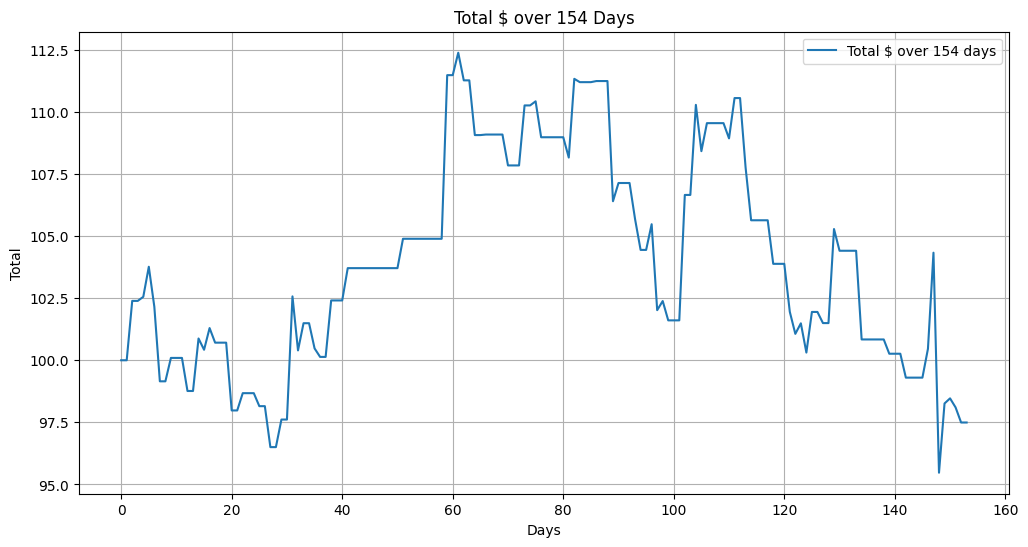

In [38]:
def graph(sum_total):
    plt.figure(figsize=(12, 6))
    plt.plot(sum_total, label=f'Total $ over {len(sum_total)} days')
    plt.title(f'Total $ over {len(sum_total)} Days')
    plt.xlabel('Days')
    plt.ylabel('Total')
    plt.legend()
    plt.grid(True)
    plt.show()
    
graph(sum_total)
